### Import libraries

In [1]:
%matplotlib inline

# importing pandas and numpy
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import os

### Import log file

In [45]:
# dit stukje al geven
df = pd.read_csv(os.path.join('..', 'data', 'logs', 'history_20181113_2149.csv'),
                   index_col='datetime', parse_dates=True).drop(['Unnamed: 0'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1744 entries, 2018-11-13 21:48:26.048002 to 2018-11-13 21:49:14.391852
Data columns (total 9 columns):
angle_of_attack    1744 non-null float64
boat_angle         1744 non-null float64
boat_heel          1734 non-null float64
boat_speed         1744 non-null float64
course_error       1744 non-null float64
rudder_angle       1744 non-null float64
target_angle       1729 non-null float64
wind_direction     1744 non-null float64
wind_speed         1744 non-null float64
dtypes: float64(9)
memory usage: 136.2 KB


* angle_of_attack: wind direction relative to the boat
> * A positive angle of attack means the wind is blowing onto the right (starboard) side of the boat
> * A negative angle of attack means the wind is blowing onto the left (port) side of the boat
* boat_angle: compass direction in which the boat is going (North==0/360, East==90, South==180, West==270)
* boat_heel: heeling angle in degrees (rotation around the longitudinal axis).
* boat_speed: speed in knots (5 knots is 9.26 km per hr)
* course_error: difference between boat_angle and target_angle
* rudder_angle: position of the rudder relative to centerline of the boat
* target_angle: compass direction in which you want to go
* wind_direction: direction from where the wind is coming
* wind_speed: wind speed in knots

In [22]:
# Print the first 5 rows of the dataframe
df.head()

,angle_of_attack,boat_angle,boat_heel,boat_speed,course_error,rudder_angle,target_angle,wind_direction,wind_speed
datetime,,,,,,,,,
2018-11-12 15:34:00.193261,49.818817,-0.521143,6.051032,5.278842,-68.562563,0.0,68.683584,49.939838,7.906031
2018-11-12 15:34:00.261939,48.809147,1.376665,6.360429,5.102395,-68.435355,0.0,68.683584,49.057376,8.435802
2018-11-12 15:34:00.303224,48.790432,0.908915,6.397038,4.646771,-68.307414,0.0,68.683584,49.166602,8.486678
2018-11-12 15:34:00.343971,47.781607,0.690801,5.833357,4.847343,-68.190747,-0.3,68.683584,48.274444,7.862137
2018-11-12 15:34:00.384062,47.349877,0.619566,5.911353,4.556190,-68.042668,-0.6,68.683584,47.990793,8.021908


In [23]:
# Print the last 5 rows of the dataframe
df.tail()

,angle_of_attack,boat_angle,boat_heel,boat_speed,course_error,rudder_angle,target_angle,wind_direction,wind_speed
datetime,,,,,,,,,
2018-11-12 17:38:34.853422,55.784300,164.249477,17.260422,6.250201,0.278431,2.970342,165.097434,221.160165,20.788190
2018-11-12 17:38:34.908993,55.097710,165.468185,16.936453,6.023505,0.256632,2.968250,165.097434,220.451776,20.566494
2018-11-12 17:38:34.968329,55.007939,164.980385,16.758677,6.576468,0.231519,2.956941,165.097434,220.336892,20.373504
2018-11-12 17:38:35.026107,54.539834,164.721867,16.007297,6.042890,0.192744,2.939273,165.097434,219.830012,19.574855
2018-11-12 17:38:35.087084,55.434561,165.955182,16.183243,6.473156,0.159626,2.912147,165.097434,220.691621,19.576412


### Plotting the variables
First we will have a visual look at the data.

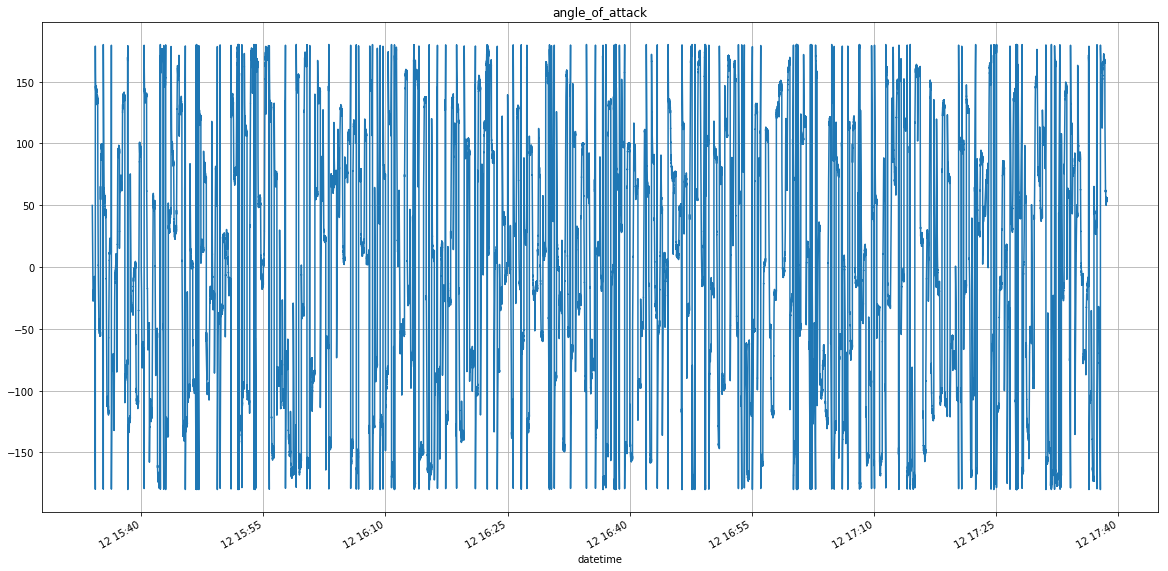

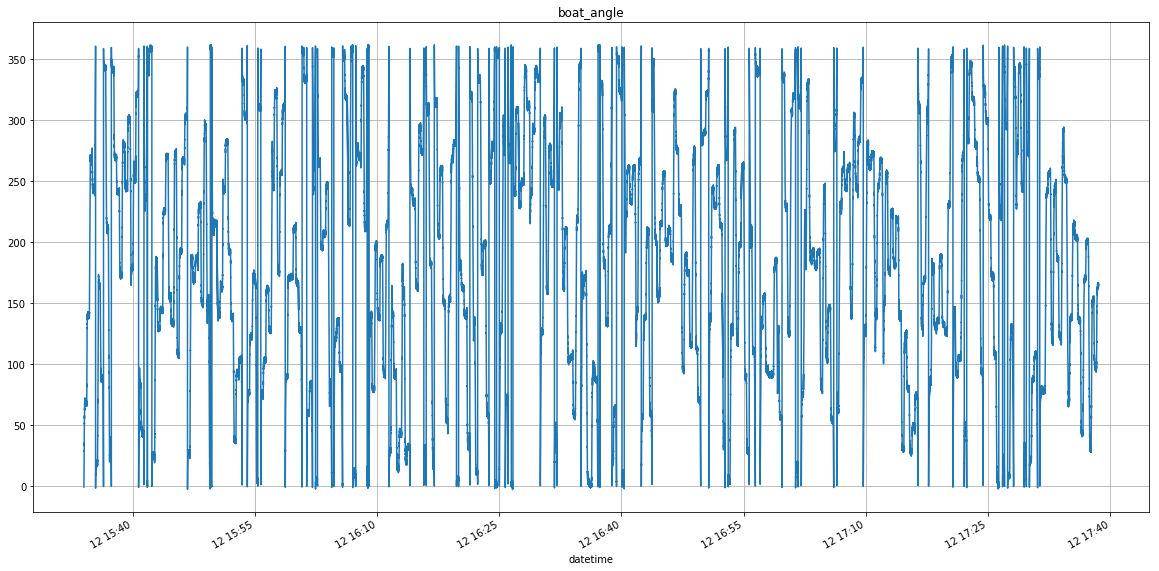

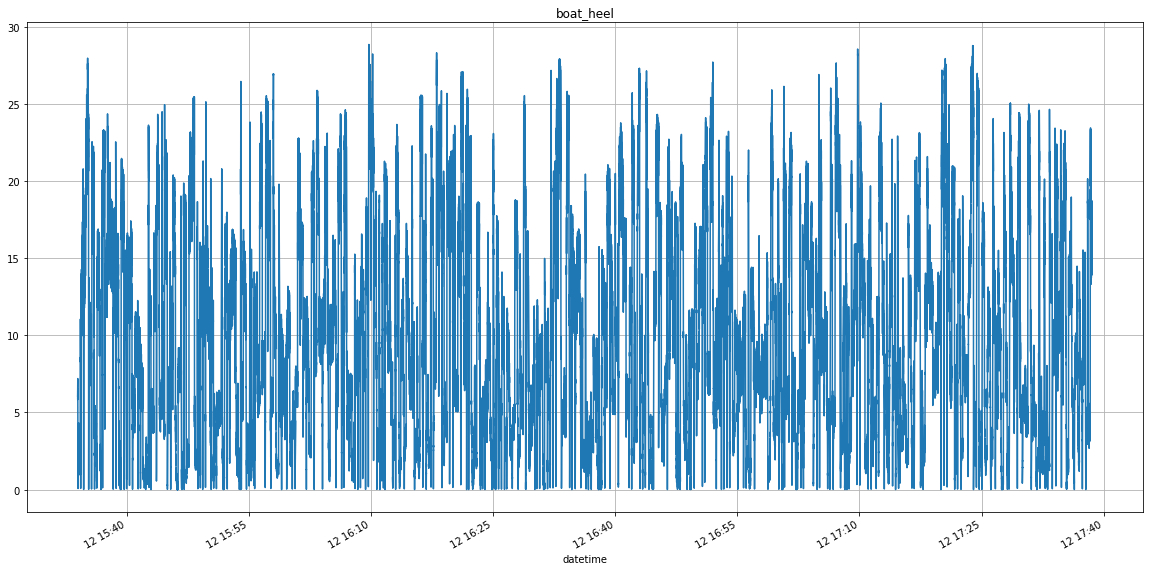

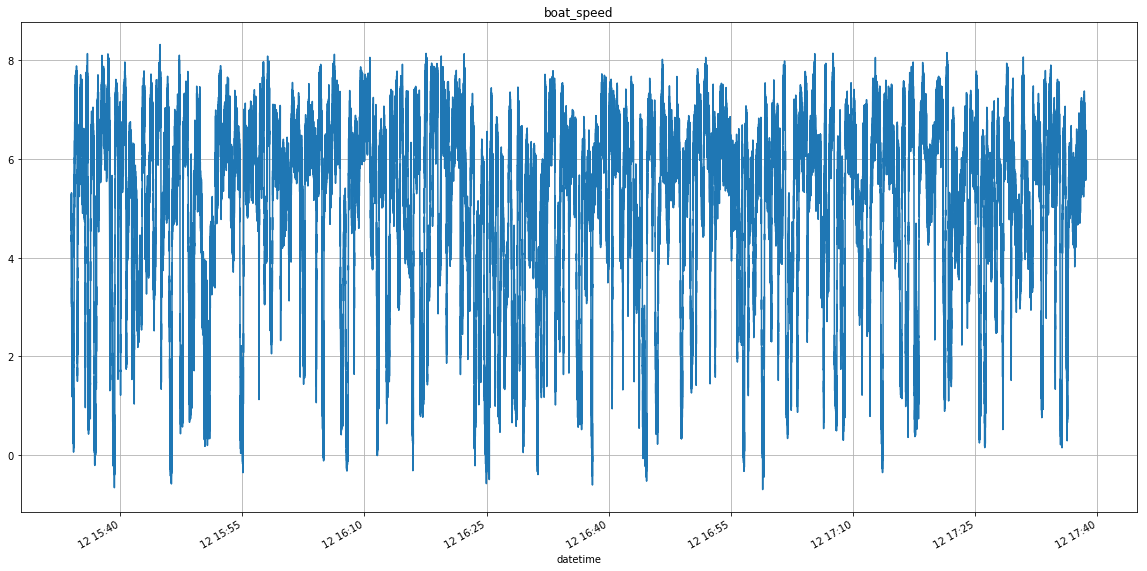

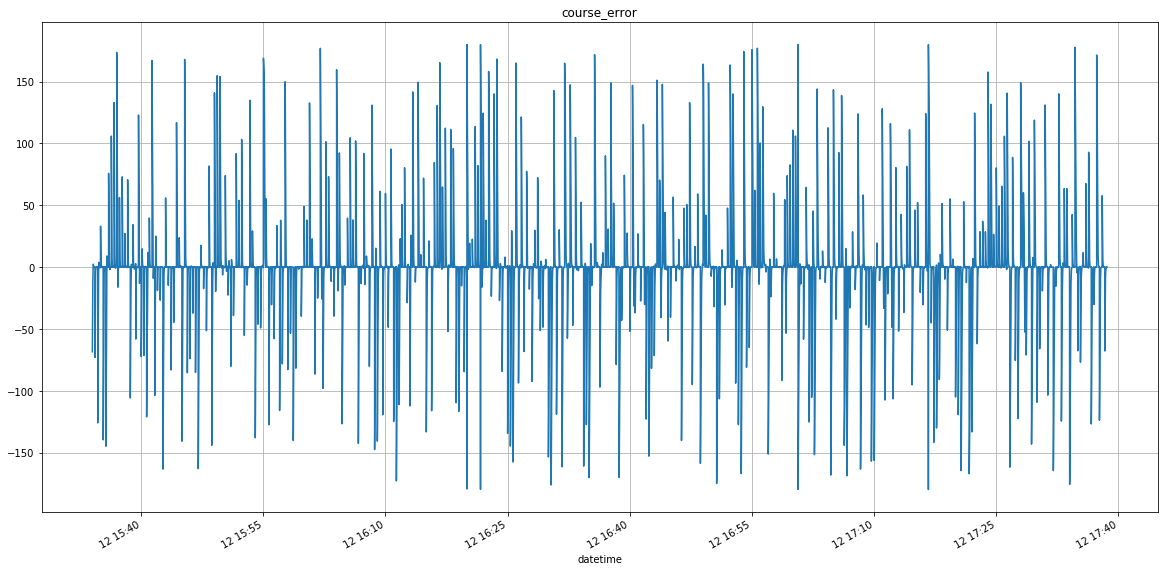

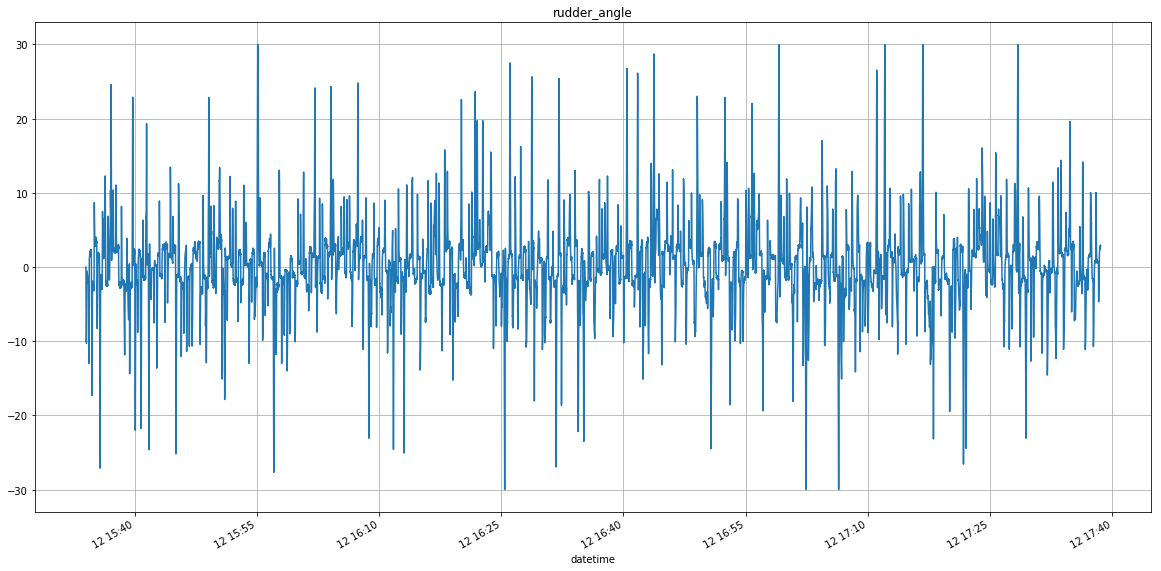

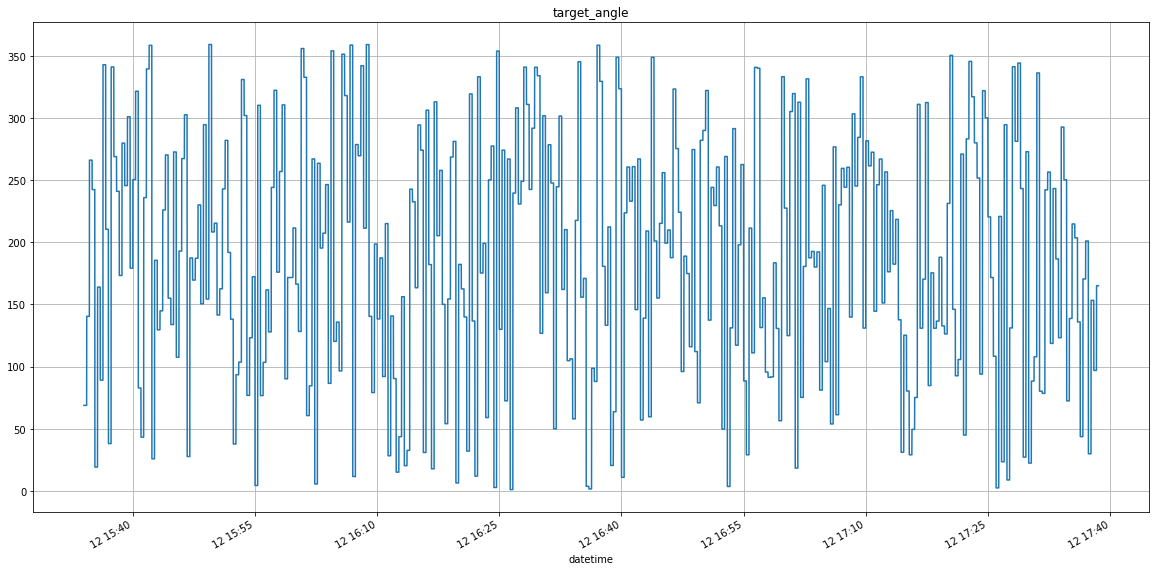

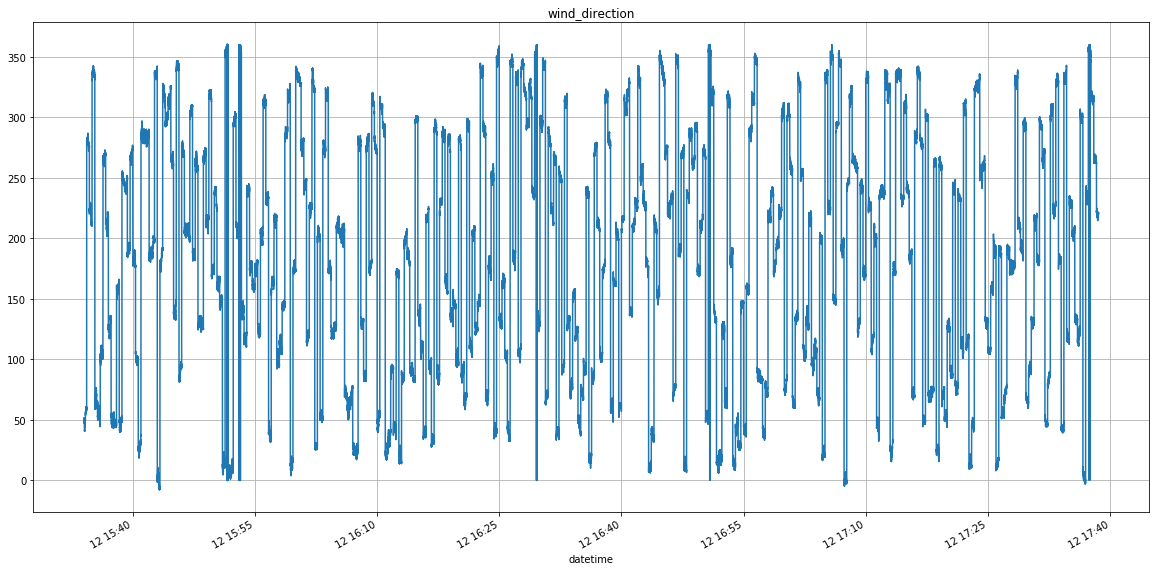

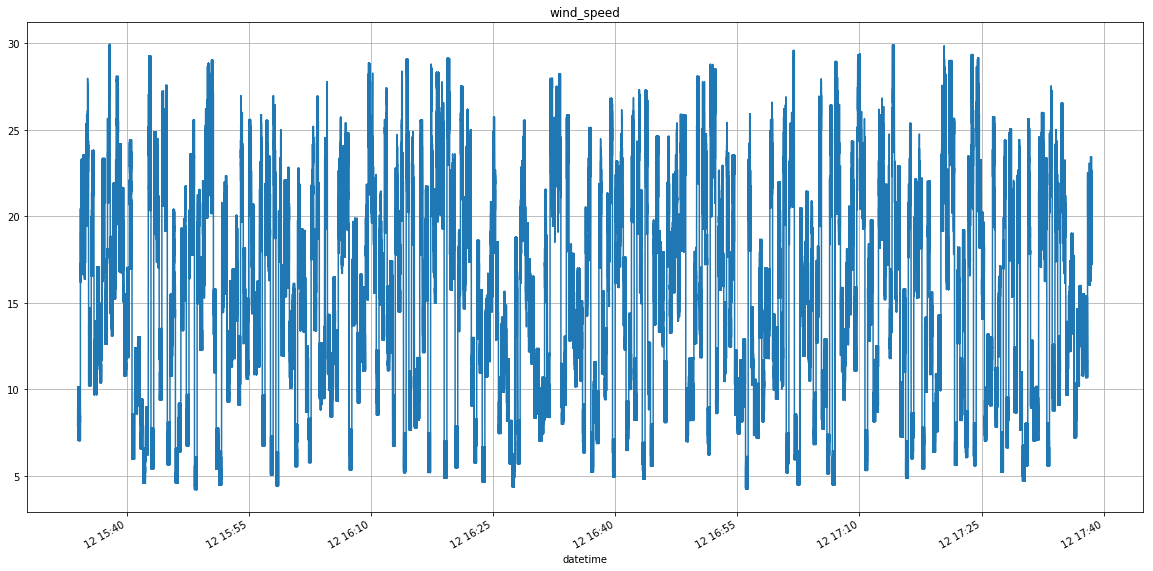

In [24]:
# Plot the data
variables = list(df)
for var in variables:
    _, ax = plt.subplots(figsize=(20, 10))
    ax.set_title(var)
    df[var].plot(ax=ax)
    plt.grid(True)

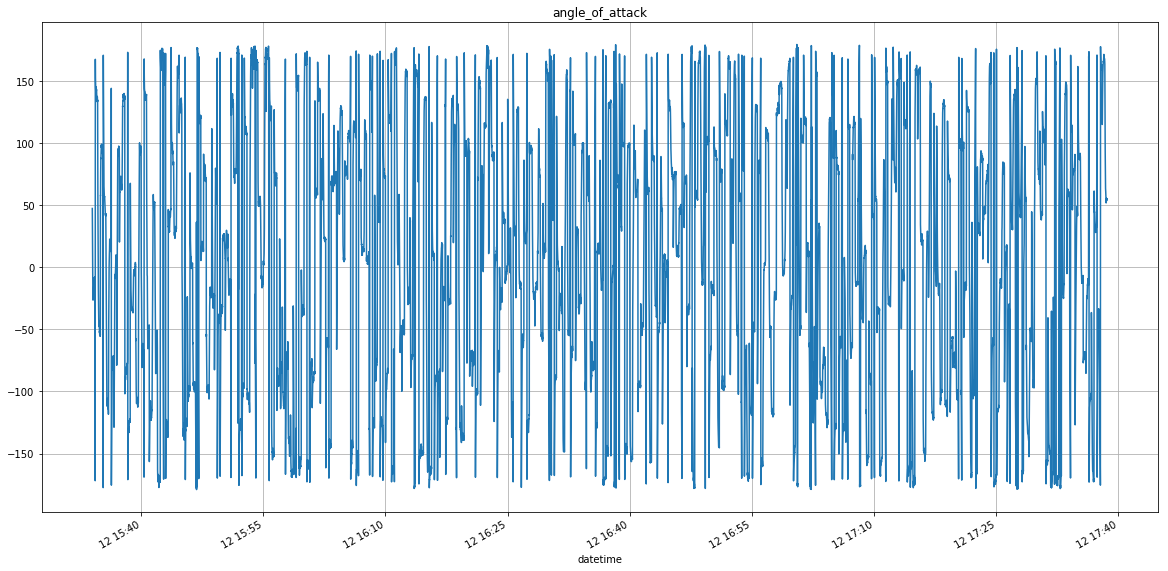

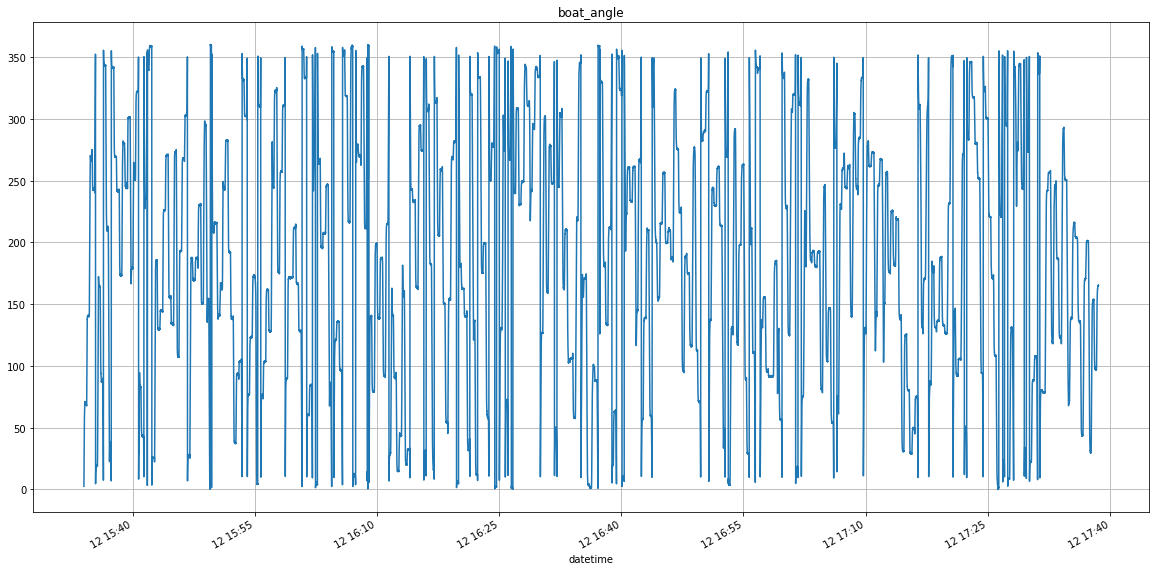

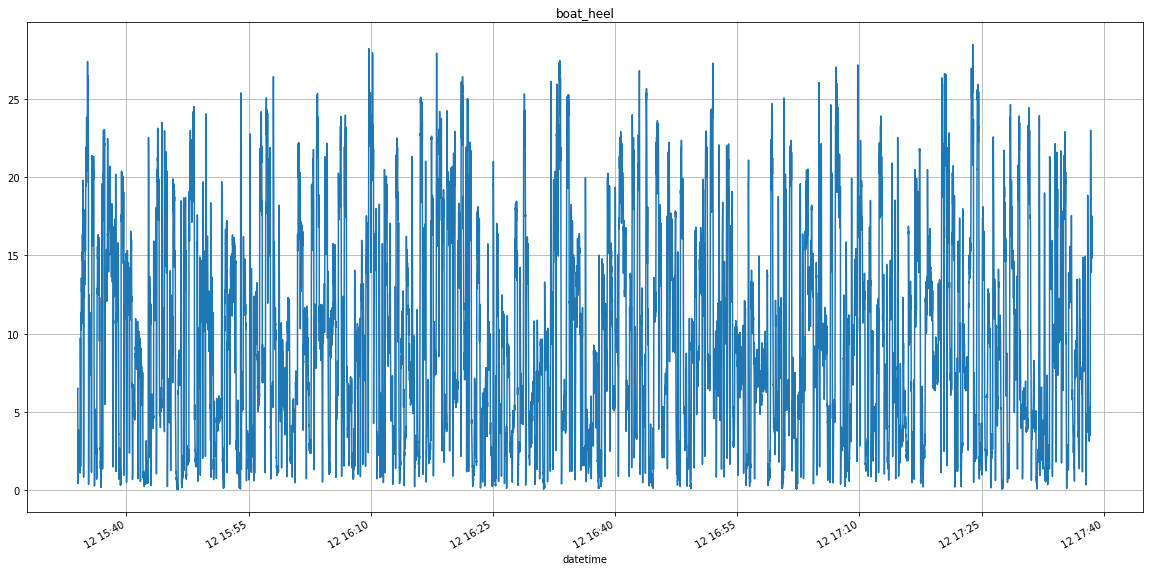

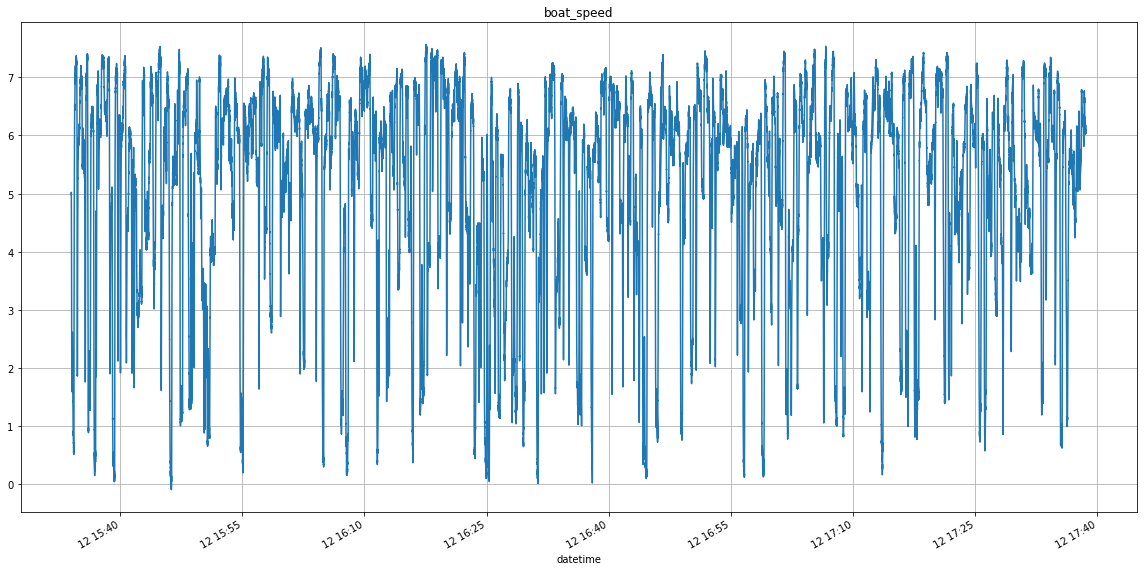

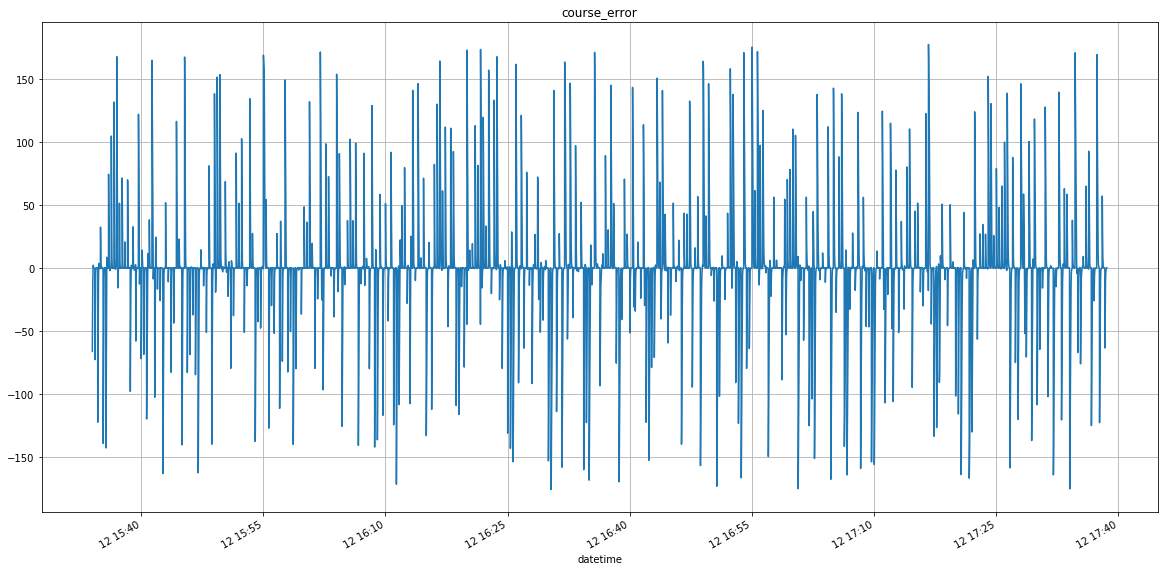

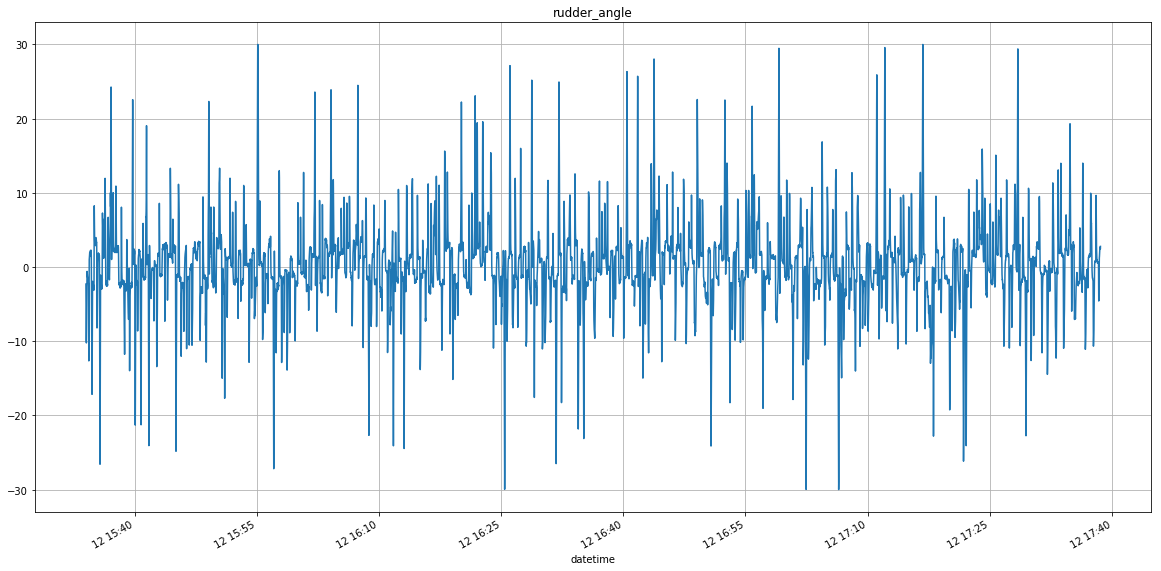

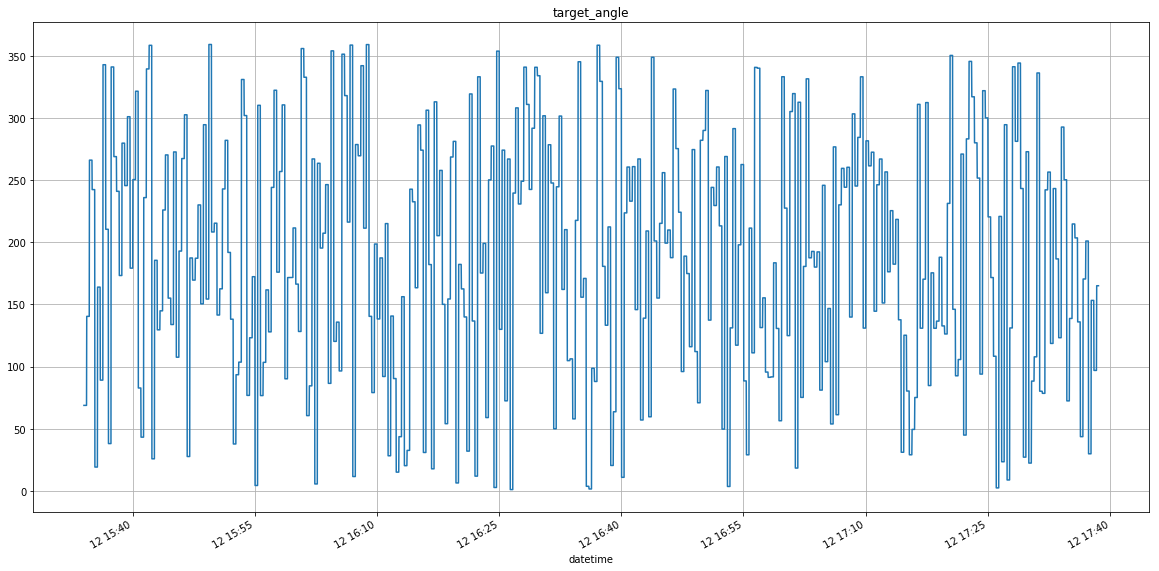

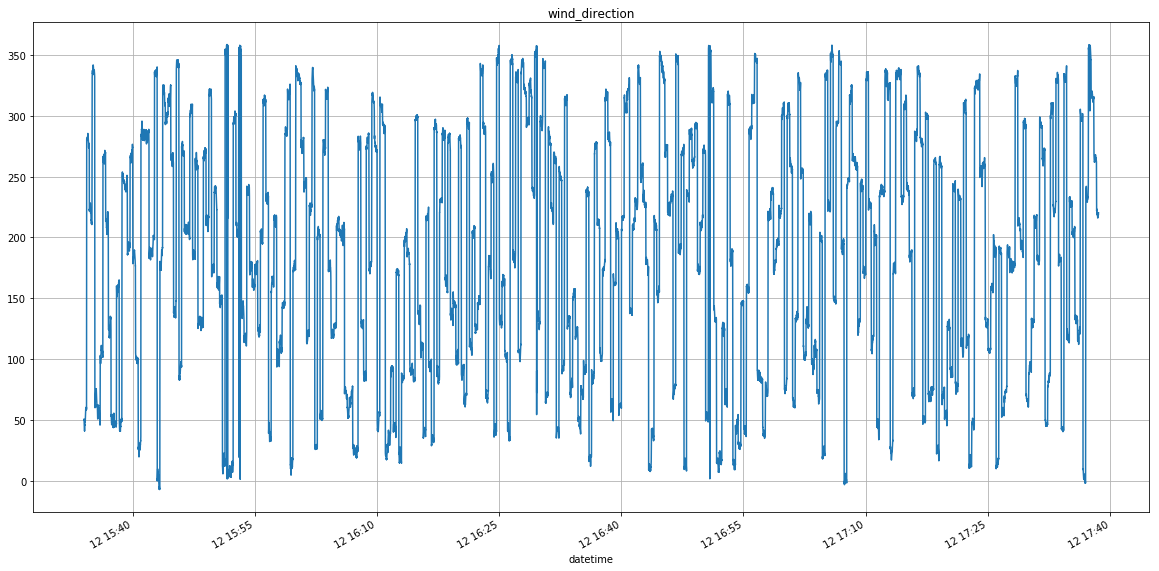

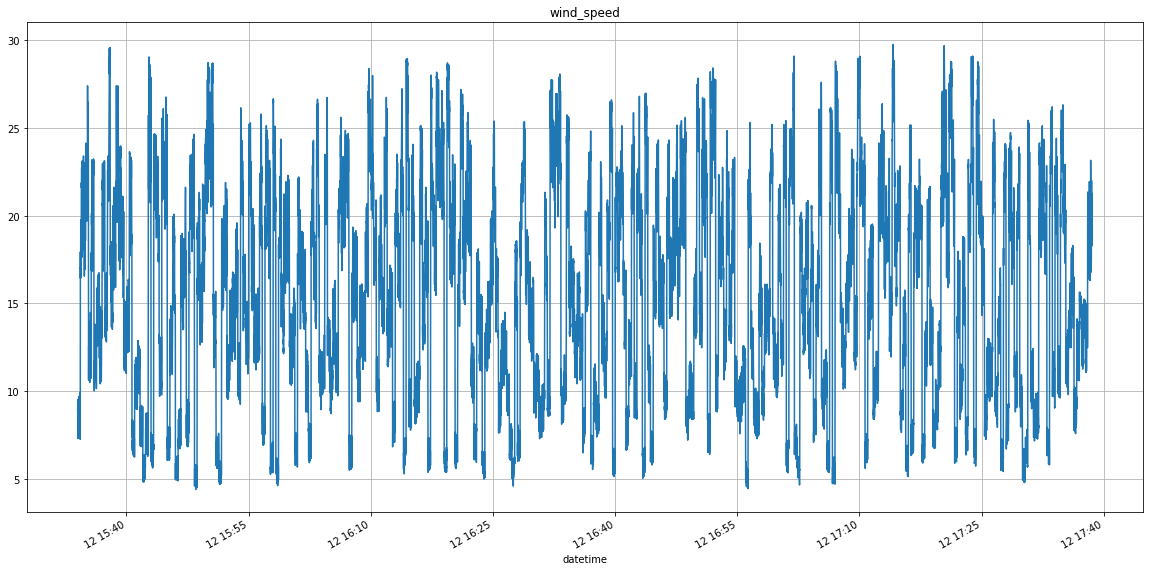

In [25]:
# try moving windows
for var in variables:
    _, ax = plt.subplots(figsize=(20, 10))
    ax.set_title(var)
    df[var].rolling(20).mean().plot(ax=ax)
    plt.grid(True)

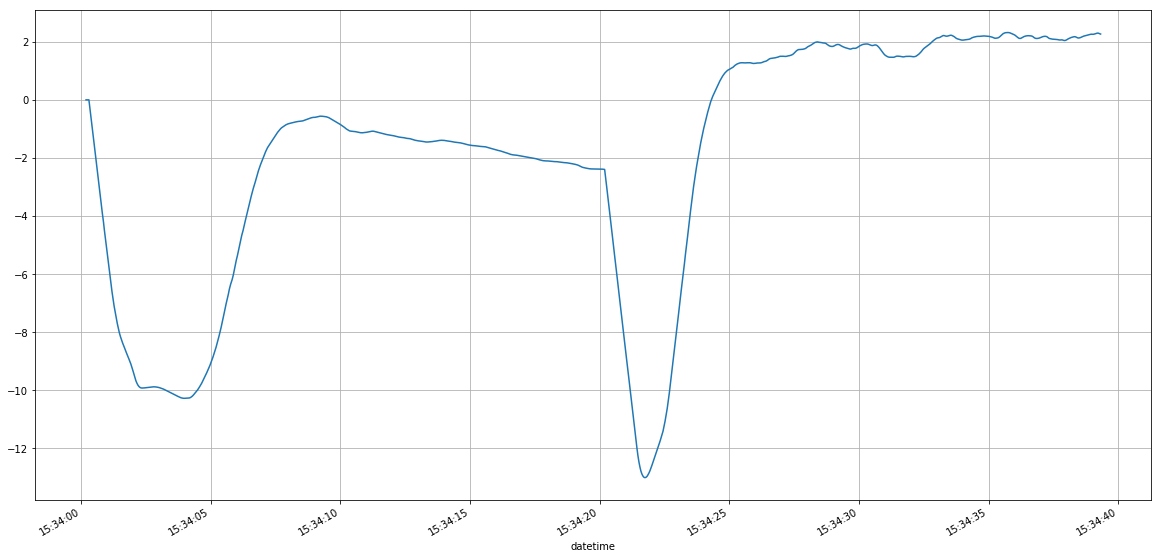

In [26]:
# plotting part of signal
_, ax = plt.subplots(figsize=(20, 10))
df.iloc[0:1000]['rudder_angle'].plot(ax=ax)
plt.grid(True)

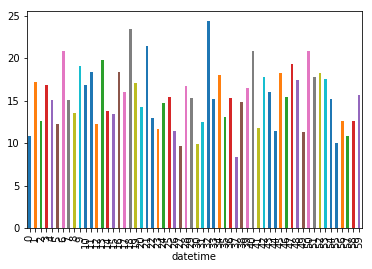

In [31]:
# group average wind_speed per minute
df_16hr = df[df.index.hour == 16]
df_16hr.groupby(df_16hr.index.minute)['wind_speed'].mean().plot(kind='bar')

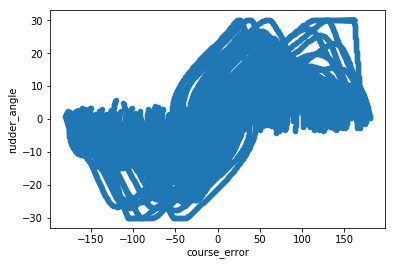

In [33]:
df.plot.scatter(x='course_error', y='rudder_angle')

### Removing NA's

In [39]:
#Which columns contain NA's?
df.isna().sum()

angle_of_attack     0
boat_angle          0
boat_heel          10
boat_speed          0
course_error        0
rudder_angle        0
target_angle       15
wind_direction      0
wind_speed          0
dtype: int64

In [40]:
df['boat_heel'].fillna((df['boat_heel'].mean()), inplace=True)

In [41]:
df.isna().sum()

angle_of_attack     0
boat_angle          0
boat_heel           0
boat_speed          0
course_error        0
rudder_angle        0
target_angle       15
wind_direction      0
wind_speed          0
dtype: int64

### Removing outliers

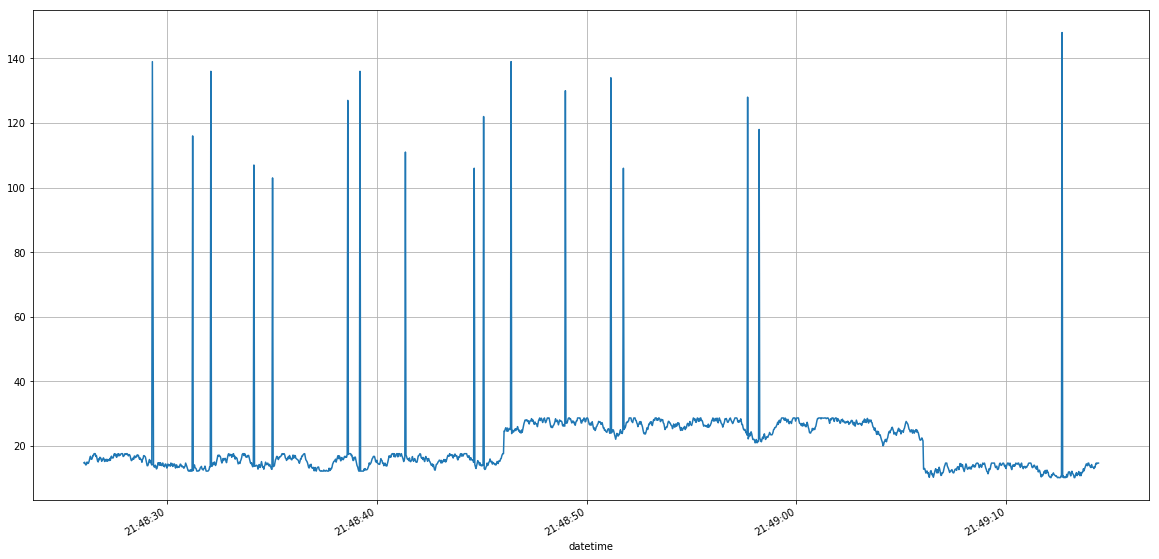

In [46]:
# Which column has outliers?
_, ax = plt.subplots(figsize=(20, 10))
df['wind_speed'].plot(ax=ax)
plt.grid(True)

In [47]:
df["wind_speed"] = df["wind_speed"].mask(df["wind_speed"] > 35, 0)

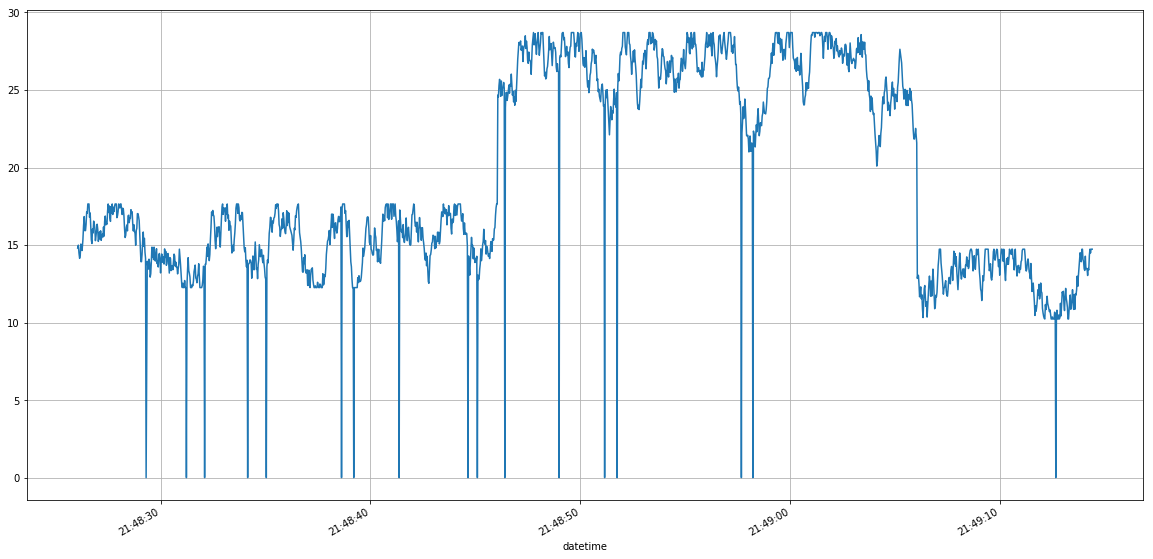

In [48]:
_, ax = plt.subplots(figsize=(20, 10))
df['wind_speed'].plot(ax=ax)
plt.grid(True)

### Clipping rudder_angle

In [29]:
# Check minimum and maximum rudder angle:
df.rudder_angle.min(), df.rudder_angle.max()

(-11.560505458924991, 0.5216799551171323)

In [30]:
# Clip rudder angle to [-10, 10]
df["rudder_angle"] = df["rudder_angle"].mask(df["rudder_angle"] > 10, 10)
df["rudder_angle"] = df["rudder_angle"].mask(df["rudder_angle"] < -10, -10)

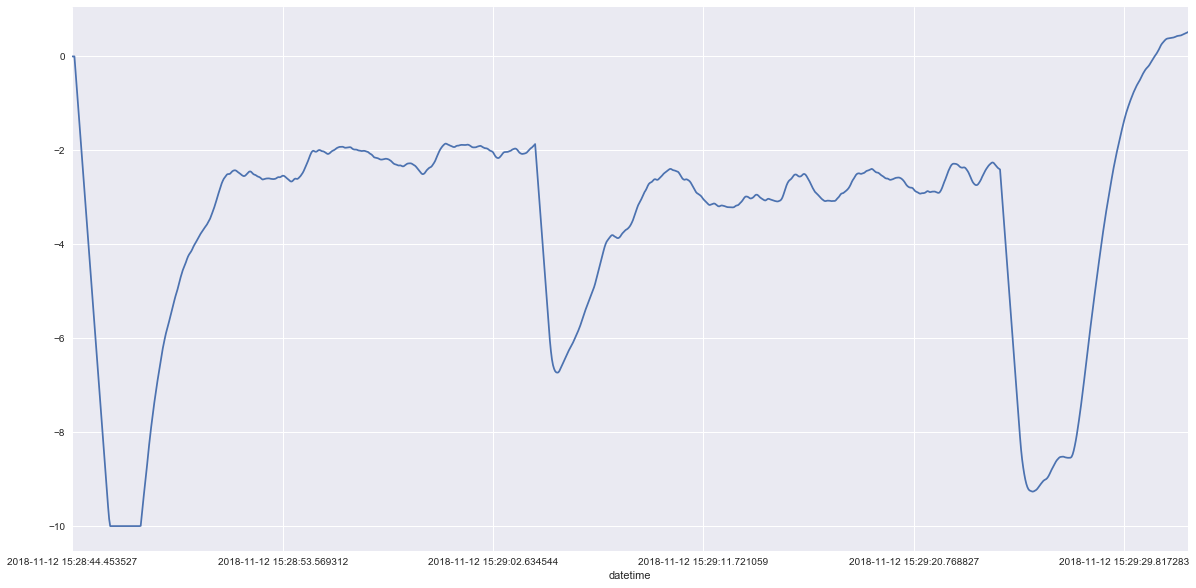

In [31]:
_, ax = plt.subplots(figsize=(20, 10))
df.rudder_angle.plot(ax=ax)

### Creating a new feature

In [5]:
df['VMG'] = df.boat_speed*np.cos(np.deg2rad(df.course_error))

df = df[['wind_speed', 'wind_direction',
         'angle_of_attack', 'boat_heel',
         'boat_speed', 'VMG',
         'target_angle', 'boat_angle', 'course_error',
         'rudder_angle']]

df.head()

,wind_speed,wind_direction,angle_of_attack,boat_heel,boat_speed,VMG,target_angle,boat_angle,course_error,rudder_angle
datetime,,,,,,,,,,
2018-11-12 15:34:00.193261,7.906031,49.939838,49.818817,6.051032,5.278842,1.929338,68.683584,-0.521143,-68.562563,0.0
2018-11-12 15:34:00.261939,8.435802,49.057376,48.809147,6.360429,5.102395,1.875389,68.683584,1.376665,-68.435355,0.0
2018-11-12 15:34:00.303224,8.486678,49.166602,48.790432,6.397038,4.646771,1.717570,68.683584,0.908915,-68.307414,0.0
2018-11-12 15:34:00.343971,7.862137,48.274444,47.781607,5.833357,4.847343,1.800874,68.683584,0.690801,-68.190747,-0.3
2018-11-12 15:34:00.384062,8.021908,47.990793,47.349877,5.911353,4.556190,1.703632,68.683584,0.619566,-68.042668,-0.6


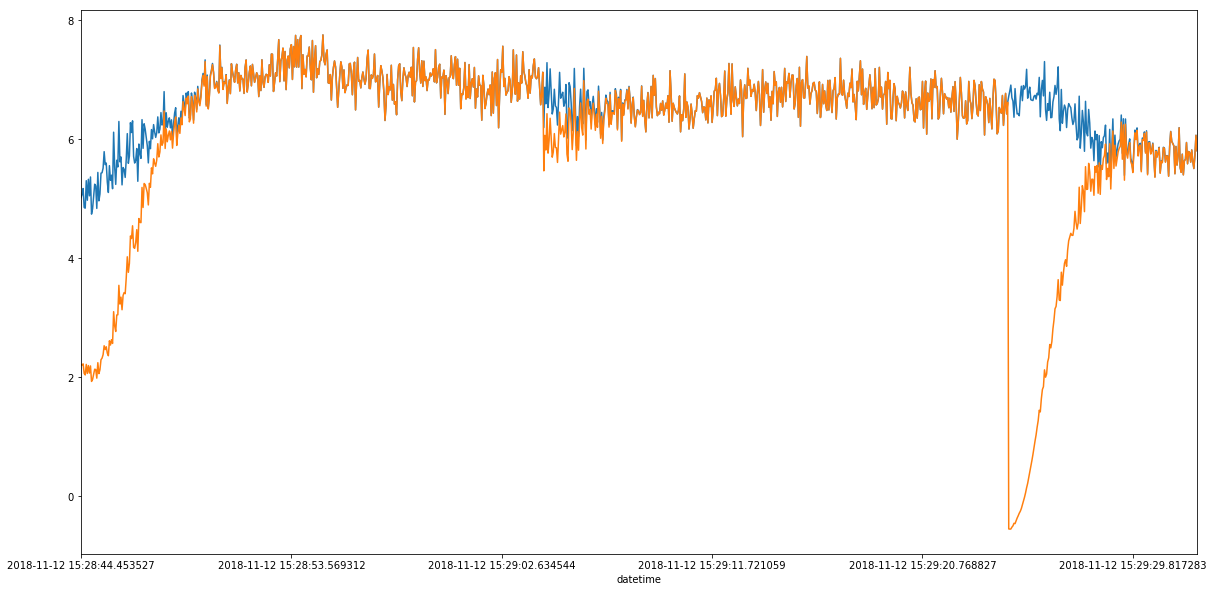

In [23]:
_, ax = plt.subplots(figsize=(20, 10))
df.boat_speed.plot(ax=ax)
df.VMG.plot(ax=ax)

### Normalising data

Maybe this belongs to the machine learning part

### Plotting correlation matrix

In [6]:
corr = df.corr()
corr.style.background_gradient()

,wind_speed,wind_direction,angle_of_attack,boat_heel,boat_speed,VMG,target_angle,boat_angle,course_error,rudder_angle
wind_speed,1,0.100344,0.075909,0.622948,0.381296,0.251218,0.0614209,0.0413135,-0.0315221,0.021635
wind_direction,0.100344,1,0.0815391,0.058382,-0.00466797,-0.00548951,0.0603329,0.047232,0.0217387,0.0554432
angle_of_attack,0.075909,0.0815391,1,0.0773903,0.0826843,0.0481267,-0.045931,-0.0254874,0.0217762,0.265943
boat_heel,0.622948,0.058382,0.0773903,1,0.640041,0.411089,0.0724044,0.0562111,-0.0308381,0.0303037
boat_speed,0.381296,-0.00466797,0.0826843,0.640041,1,0.596327,0.0126366,-0.010629,-0.0276509,0.010633
VMG,0.251218,-0.00548951,0.0481267,0.411089,0.596327,1,0.0296892,0.00474208,-0.0191132,0.00587258
target_angle,0.0614209,0.0603329,-0.045931,0.0724044,0.0126366,0.0296892,1,0.757027,-0.0372505,-0.0525081
boat_angle,0.0413135,0.047232,-0.0254874,0.0562111,-0.010629,0.00474208,0.757027,1,0.020866,-0.0208435
course_error,-0.0315221,0.0217387,0.0217762,-0.0308381,-0.0276509,-0.0191132,-0.0372505,0.020866,1,0.625584
rudder_angle,0.021635,0.0554432,0.265943,0.0303037,0.010633,0.00587258,-0.0525081,-0.0208435,0.625584,1


* slices
* to_pickle voor stukje Wouter